In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Load clean data
df = pd.read_csv('../data/BiztelAI_DS_Dataset_V1.csv')

# Basic clean
df.dropna(inplace=True)
df = df.drop_duplicates()
df['chat_id'] = df['chat_id'].astype(str)


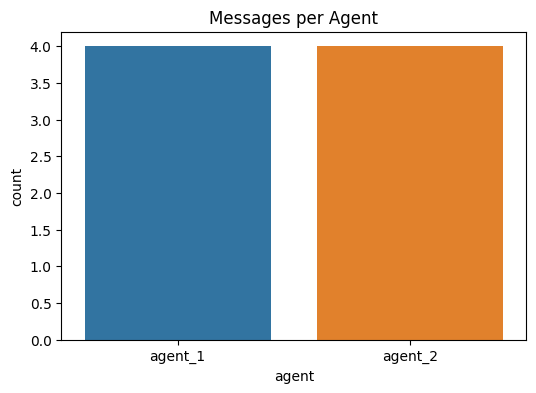

In [2]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='agent')
plt.title('Messages per Agent')
plt.show()


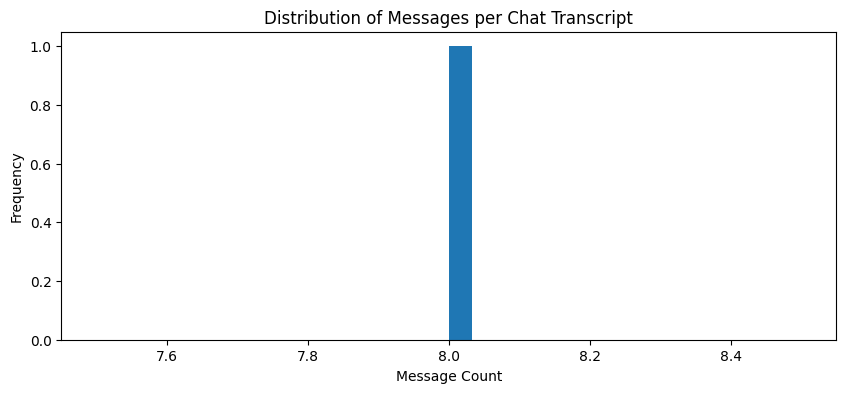

In [3]:
msg_counts = df.groupby('chat_id')['message'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
msg_counts.plot(kind='hist', bins=30)
plt.title('Distribution of Messages per Chat Transcript')
plt.xlabel('Message Count')
plt.show()


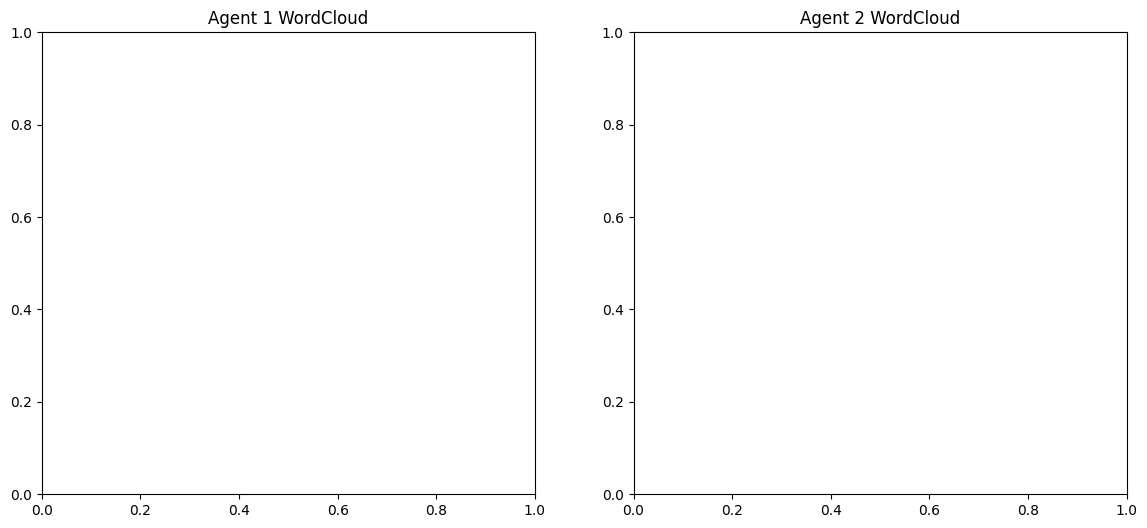

In [4]:
agent1_text = " ".join(df[df['agent'] == 'agent_1']['message'])
agent2_text = " ".join(df[df['agent'] == 'agent_2']['message'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
WordCloud(width=600, height=400, background_color='white').generate(agent1_text).to_image()
plt.title('Agent 1 WordCloud')

plt.subplot(1,2,2)
WordCloud(width=600, height=400, background_color='white').generate(agent2_text).to_image()
plt.title('Agent 2 WordCloud')
plt.show()


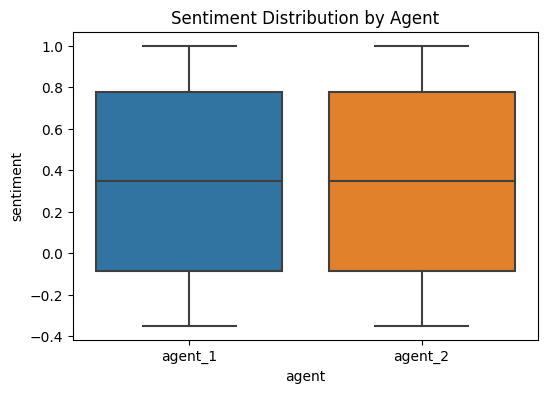

In [5]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment'] = df['message'].apply(get_sentiment)

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='agent', y='sentiment')
plt.title('Sentiment Distribution by Agent')
plt.show()
